In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
pre1834 = '../data/sparql_servants_pre1834.csv'
post1834 = '../data/sparql_servants_post1834.csv'

In [82]:
pre1834 = pd.read_csv(pre1834)
post1834 = pd.read_csv(post1834)

In [83]:
complete = pd.concat([pre1834, post1834])
complete = complete.reset_index()
print(complete)
complete.head()

      index                                               p  \
0         0    http://cltl.nl/oldbailey/t16760114-1-defend2   
1         1  http://cltl.nl/oldbailey/t16761213-11-defend18   
2         2   http://cltl.nl/oldbailey/t16770425-6-victim10   
3         3    http://cltl.nl/oldbailey/t16770906-5-defend8   
4         4  http://cltl.nl/oldbailey/t16780116-11-defend18   
...     ...                                             ...   
4512    320       http://cltl.nl/oldbailey/def1-14-19130107   
4513    321      http://cltl.nl/oldbailey/t19130204-name-19   
4514    322      http://cltl.nl/oldbailey/t19130204-name-16   
4515    323      http://cltl.nl/oldbailey/def2-63a-19130304   
4516    324       http://cltl.nl/oldbailey/def1-23-19130401   

                                    dm                                g  
0                              servant    http://cltl.nl/oldbailey/male  
1                              servant  http://cltl.nl/oldbailey/female  
2                    

,index,p,dm,g
0,0,http://cltl.nl/oldbailey/t16760114-1-defend2,servant,http://cltl.nl/oldbailey/male
1,1,http://cltl.nl/oldbailey/t16761213-11-defend18,servant,http://cltl.nl/oldbailey/female
2,2,http://cltl.nl/oldbailey/t16770425-6-victim10,servant,http://cltl.nl/oldbailey/female
3,3,http://cltl.nl/oldbailey/t16770906-5-defend8,servant,http://cltl.nl/oldbailey/male
4,4,http://cltl.nl/oldbailey/t16780116-11-defend18,Maid-servant,http://cltl.nl/oldbailey/female


In [84]:
for i, row in complete.iterrows():
    if 'def' in row.p:
        complete.at[i, 'role'] = 'defendant'
    else:
        complete.at[i, 'role'] = 'victim'
    
    genders = row.g.split('/')
    complete.at[i, 'g'] = genders[-1]
    
    https, name = row.p.split('http://cltl.nl/oldbailey/')
    if name.startswith('t') or name.startswith('s'):
        complete.at[i, 'year'] = int(name[1:5])
    else:
        complete.at[i, 'year'] = int(name.split('-')[-1][:4])
        
    if 'oldbailey' in row.dm:
        http, occupation = row.dm.split('oldbailey/')
        complete.at[i, 'dm'] = occupation
    
complete.head()

,index,p,dm,g,role,year
0,0,http://cltl.nl/oldbailey/t16760114-1-defend2,servant,male,defendant,1676.0
1,1,http://cltl.nl/oldbailey/t16761213-11-defend18,servant,female,defendant,1676.0
2,2,http://cltl.nl/oldbailey/t16770425-6-victim10,servant,female,victim,1677.0
3,3,http://cltl.nl/oldbailey/t16770906-5-defend8,servant,male,defendant,1677.0
4,4,http://cltl.nl/oldbailey/t16780116-11-defend18,Maid-servant,female,defendant,1678.0


In [85]:
complete.drop(['p'], axis=1, inplace=True)

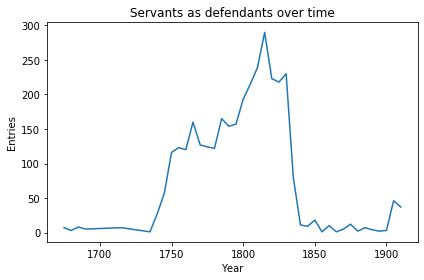

In [86]:
def_df = complete[complete.role =='defendant']

years = list()
numbers = list()

for label, df in def_df.groupby((def_df["year"]//5*5)):
    years.append(label)
    numbers.append(len(df))
    
plt.plot(years, numbers)
plt.title('Servants as defendants over time')
plt.xlabel('Year')
plt.ylabel('Entries')
plt.tight_layout()
plt.savefig('../images/comp_5year_servants_defendants.jpg')

In [87]:
print(complete.year.describe())

count    4517.000000
mean     1802.510737
std        32.783143
min      1676.000000
25%      1780.000000
50%      1806.000000
75%      1823.000000
max      1913.000000
Name: year, dtype: float64


In [92]:
male = complete[complete.g=='male']
female = complete[complete.g=='female']

mdef = male[male.role == 'defendant']
print(len(mdef))
mvic = male[male.role == 'victim']

fdef = female[female.role == 'defendant']
print(len(fdef))
fvic = female[female.role == 'victim']

1540
      index                        dm       g       role    year
1         1                   servant  female  defendant  1676.0
4         4              Maid-servant  female  defendant  1678.0
5         5  servant to a Washerwoman  female  defendant  1679.0
6         6      servant to a Midwife  female  defendant  1679.0
7         7              Maid servant  female  defendant  1679.0
...     ...                       ...     ...        ...     ...
4508    316                   servant  female  defendant  1912.0
4510    318                   servant  female  defendant  1912.0
4511    319                   servant  female  defendant  1913.0
4512    320                   servant  female  defendant  1913.0
4516    324                   servant  female  defendant  1913.0

[1799 rows x 5 columns]
1799


[1670.0, 1680.0, 1710.0, 1730.0, 1740.0, 1750.0, 1760.0, 1770.0, 1780.0, 1790.0, 1800.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1860.0, 1870.0, 1880.0, 1890.0, 1900.0, 1910.0]


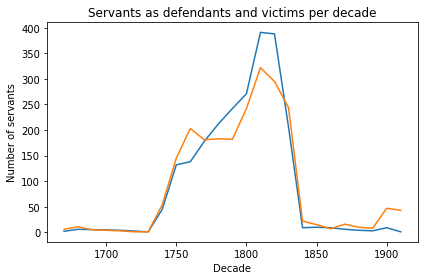

In [89]:
male_decade_years= list()
male_decade_counts = list()
fem_decade_years = list()
fem_decade_counts = list()

for label, df in male.groupby((male["year"]//10*10)):
    male_decade_years.append(label)
    male_decade_counts.append(len(df))
    
for label, df in female.groupby((female["year"]//10*10)):
    fem_decade_years.append(label)
    fem_decade_counts.append(len(df))
    
print(male_decade_years)
    
plt.plot(male_decade_years, male_decade_counts)
plt.plot(fem_decade_years, fem_decade_counts)
plt.xlabel('Decade')
plt.ylabel('Number of servants')
plt.title('Servants as defendants and victims per decade')
plt.tight_layout()

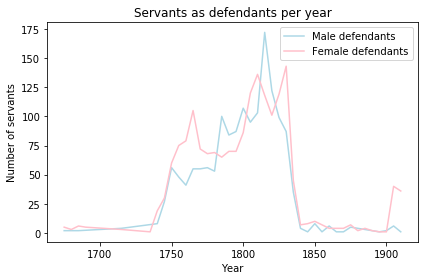

In [69]:
def_male_decade_years= list()
def_male_decade_counts = list()
def_fem_decade_years = list()
def_fem_decade_counts = list()

for label, df in mdef.groupby((mdef["year"]//5*5)):
    def_male_decade_years.append(label)
    def_male_decade_counts.append(len(df))
    
for label, df in fdef.groupby((fdef["year"]//5*5)):
    def_fem_decade_years.append(label)
    def_fem_decade_counts.append(len(df))
        
plt.plot(def_male_decade_years, def_male_decade_counts, label = 'Male defendants', color='lightblue')
plt.plot(def_fem_decade_years, def_fem_decade_counts, label = 'Female defendants', color='pink')
plt.xlabel('Year')
plt.ylabel('Number of servants')
plt.title('Servants as defendants per year')
plt.legend()
plt.tight_layout()
plt.savefig('../images/5year_servants_defendants.jpg')

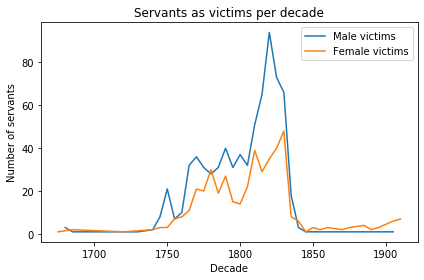

In [61]:
vic_male_decade_years= list()
vic_male_decade_counts = list()
vic_fem_decade_years = list()
vic_fem_decade_counts = list()

for label, df in mvic.groupby((mvic["year"]//5*5)):
    vic_male_decade_years.append(label)
    vic_male_decade_counts.append(len(df))
    
for label, df in fvic.groupby((fvic["year"]//5*5)):
    vic_fem_decade_years.append(label)
    vic_fem_decade_counts.append(len(df))
    
fig, ax = plt.subplots()
ax.plot(vic_male_decade_years, vic_male_decade_counts, label='Male victims')
ax.plot(vic_fem_decade_years, vic_fem_decade_counts, label='Female victims')
plt.xlabel('Decade')
plt.ylabel('Number of servants')
plt.title('Servants as victims per decade')
leg = ax.legend()
plt.tight_layout()

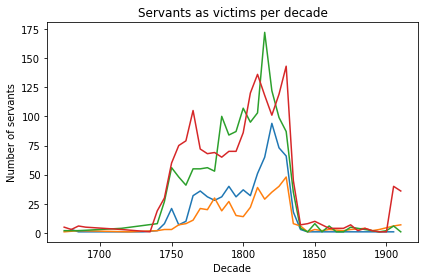

In [62]:
plt.plot(vic_male_decade_years, vic_male_decade_counts)
plt.plot(vic_fem_decade_years, vic_fem_decade_counts)
plt.plot(def_male_decade_years, def_male_decade_counts)
plt.plot(def_fem_decade_years, def_fem_decade_counts)
plt.xlabel('Decade')
plt.ylabel('Number of servants')
plt.title('Servants as victims per decade')
plt.tight_layout()

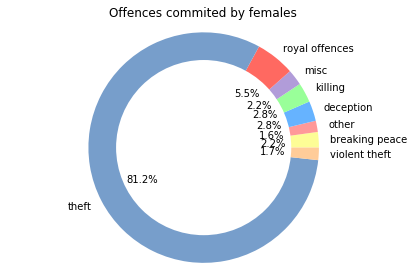

In [93]:
f_offences = ['breaking peace', 'other', 'deception', 'killing', 'misc', 'royal offences', 
              'theft', 'violent theft']
f_numbers = [940, 172+508, 1211, 1192, 966, 2372, 35122, 753]

colors = ['#fdfd96', '#ff9999', '#66b3ff', '#99ff99', '#b19cd9', '#ff6961',  '#779ecb' ,'#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(f_numbers,
        labels=f_offences, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.76,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited by females')
plt.tight_layout()
plt.show()

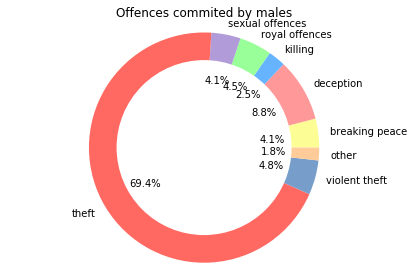

In [98]:
m_offences = ['breaking peace', 'deception', 'killing', 'royal offences', 
              'sexual offences', 'theft', 'violent theft', 'other']
m_numbers = [6551, 14246, 3969, 7347, 6627, 112038, 7806, 2040+851]

colors = ['#fdfd96', '#ff9999', '#66b3ff', '#99ff99', '#b19cd9', '#ff6961',  '#779ecb' ,'#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(m_numbers,
        labels=m_offences, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.76,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited by males')
plt.tight_layout()
plt.show()

In [65]:
defendant_csv = '../data/complete_defendants.csv'
defendant_df = pd.read_csv(defendant_csv)
fem_def_df = defendant_df[defendant_df['gender'] == 'female']

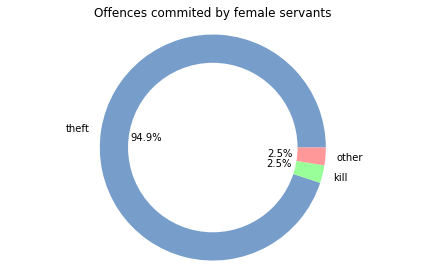

In [66]:
offence_counts = fem_def_df['offenceCategory'].value_counts()
#labels=offence_counts.index.to_list()
#numbers=offence_counts.to_list()

numbers = [2330, 62, 26+11+12+13] 
labels = ['theft', 'kill', 'other']

colors = ['#779ecb', '#99ff99', '#ff9999']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%', colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited by female servants')
plt.tight_layout()

In [77]:
mdef = mdef[mdef["year"] <= 1834]
mdef = mdef[mdef["year"] >= 1740]
fdef = fdef[fdef["year"] <= 1834]
fdef = fdef[fdef["year"] >= 1740]

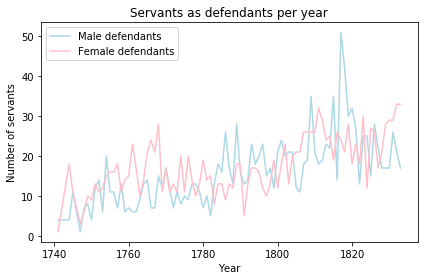

In [78]:
def_male_decade_years= list()
def_male_decade_counts = list()
def_fem_decade_years = list()
def_fem_decade_counts = list()

for label, df in mdef.groupby((mdef["year"]//1*1)):
    def_male_decade_years.append(label)
    def_male_decade_counts.append(len(df))
    
for label, df in fdef.groupby((fdef["year"]//1*1)):
    def_fem_decade_years.append(label)
    def_fem_decade_counts.append(len(df))
        
plt.plot(def_male_decade_years, def_male_decade_counts, label = 'Male defendants', color='lightblue')
plt.plot(def_fem_decade_years, def_fem_decade_counts, label = 'Female defendants', color='pink')
plt.xlabel('Year')
plt.ylabel('Number of servants')
plt.title('Servants as defendants per year')
plt.legend()
plt.tight_layout()
plt.savefig('../images/servants_defendants.jpg')